In [1]:
import cv2
import urllib.request
import json
import datetime
import time
import numpy as np
import subprocess
import matplotlib.pyplot as plt

#from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
#FUNCTION takes the date and time from the file_name and convert it to the unix time format for the event current time synchronyzation 
#file_name = input("Enter the File Name: ")
#video_file = open(file_name, "r")
#file_name ='2021-12-06-20.43.50 maxCurrent 12.627 uA fromVideoStarting 20211206-20.40.00..mp4'       #To Decrease redundency to type file-name
file_name = 'video_file.mp4'
video_file = open(file_name,"r")

#video_start_time(file_name)
thresholds = 252
#import the video file form the system and look for the corresponding events
cap = cv2.VideoCapture(file_name)
width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)  
print("frame dimentions: ", width, height )
object_detector = cv2.createBackgroundSubtractorMOG2()   #Extract the background
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('rect_file2.mp4',fourcc,20,(1920,1080), True)
fps = cap.get(cv2.CAP_PROP_FPS) 
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)
duration = frame_count/fps
#output video file is produced in .mp4 format
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter('heatmap_smooth.mp4',fourcc,7,(1920,1080))
print("Number of Frame: "+str(frame_count))         #print the total frame count in the video file
print('duration (S) = ' + str(duration))            #print the total duration of a video file
minutes = int(duration/60)
seconds = duration%60
print('duration (M:S) = ' + str(minutes) + ':' + str(seconds))
count =0
frame_count = 0
datax = []
datay = []
dataz = []
color = 'red'
while True:
    ret, frame=cap.read()
    if ret == True:
        height, width, _ = frame.shape
        min_x, min_y = width, height
        max_x = max_y = 0
        # frame[frame<=thresholds]=0
        mask = object_detector.apply(frame)
        _, mask  = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)        #mask the backgroubd to the color ratio of 255 for complete black color
        contours,_ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        res = cv2.bitwise_and(frame,frame,mask=mask)
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area>1500:    #detect for the flashes above 1000pixel
                blur = cv2.GaussianBlur(mask,(13,13), 11)
                heatmap_img = cv2.applyColorMap(blur, cv2.COLORMAP_JET)
                heatmap = cv2.resize(heatmap_img, (heatmap_img.shape[1], heatmap_img.shape[0]))
#                 M = cv2.moments(cnt)
#                 cX = int(M["m10"] / M["m00"])
#                 cY = int(M["m01"] / M["m00"])
#                 datax.append(cX)
#                 datay.append(cY)
#               calculate the radius and the center of event from the minimum enclosing circle                (x,y),radius = cv2.minEnclosingCircle(cnt)
                center = (int(x),int(y))
                radius = int(radius)
                cv2.circle(frame,center,radius,(1,100,200),2)
                datax.append(int(x))
                datay.append(int(y))
                dataz.append(int(radius))
                count +=1
                cv2.drawContours(frame, [cnt], -1, (0,255,0),2)
                #date_data.append(getdate(frame))
#                 out.write(frame)  
    else:
        break
    if cv2.waitKey(8) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


frame dimentions:  1920.0 1080.0
1858
Number of Frame: 1858
duration (S) = 74.32
duration (M:S) = 1:14.319999999999993


In [35]:
df = np.stack((datax,datay),axis = -1)

array([[473, 427],
       [616, 315],
       [450, 218],
       ...,
       [395, 733],
       [395, 733],
       [395, 733]])

In [41]:
#Thresholding all the reflection from the frame
approx_x = []
approx_y = []
approx_z = []
for i in range(len(df)):
    if ((df[i][0]>400) and (df[i][1]>400) and (df[i][0]<1450)):
        approx_x.append(df[i][0])
        approx_y.append(df[i][1])
        approx_z.append(dataz[i])

In [63]:
#counting for the individual coordinate hit 
#encircle with center and radius and looking for all the events within the circle
a_x= []
a_y= []
a_z= []
error_Debug = []
for i in range(len(df)):
    lx = (abs(df[i][0]-920))*(abs(df[i][0]-920))
    ly = (abs(df[i][1]-800))*(abs(df[i][1]-800))
    if((lx+ly)<230000):
        if((df[i][0]<700)and(df[i][1]<800)):
            error_Debug.append(df[i])
        else:
            if((df[i][0]<1275)and(df[i][0]>575)):
                a_x.append(df[i][0])
                a_y.append(df[i][1])
#                 a_z.append(dataz[i])
            else:
                error_Debug.append(df[i])
    else:
        error_Debug.append(df[i])

In [ ]:
# img = cv2.circle(img2,(805,860),40, (0,0,255),3)
#img = cv2.circle(img2,(1035,815),50, (1,100,200),2)
#img = cv2.circle(img2,(1215,1030),50, (1,100,200),2)
#img = cv2.circle(img2,(920,870),40,(1,100,200),2)
#img = cv2.circle(img2,(670,1060),40,(1,100,200),2)

In [54]:
#counting for the coordinate of 805 and 860
a_x4= []
a_y= []
a_z= []
error_Debug = []
for i in range(len(df)):
    lx = (abs(df[i][0]-920))*(abs(df[i][0]-920))
    ly = (abs(df[i][1]-870))*(abs(df[i][1]-870))
    if((lx+ly)<1600):
        a_x4.append(df[i])
    else:
        error_Debug.append(df[i])

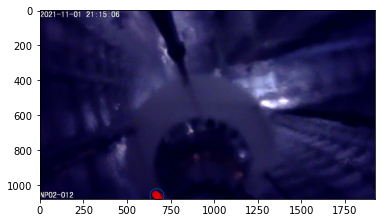

In [45]:
img2 = plt.imread("file188.jpg")
implot = plt.imshow(img2)
img = cv2.circle(img2,(670,1060),40,(1,100,200),2)
for i in range(len(a_x5)):
    dataz = df[i][1]
    plt.scatter(df[i][0],dataz,c = 'red',alpha = 0.1)
plt.plot(500,y)
plt.imshow(img)
# plt.xlim(0,1920)
# plt.ylim(0,1080)
plt.show()

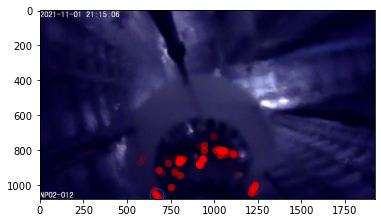

In [120]:
img2 = plt.imread("file188.jpg")
implot = plt.imshow(img2)
img = cv2.circle(img2,(670,1060),40,(1,100,200),2)
for i in range(len(a_x)):
    plt.scatter(a_x[i],a_y[i],c = 'red',alpha = 0.1)
plt.plot(500,y)
plt.imshow(img)
# plt.xlim(0,1920)
# plt.ylim(0,1080)
plt.show()